## Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Part (a): Data Simulation

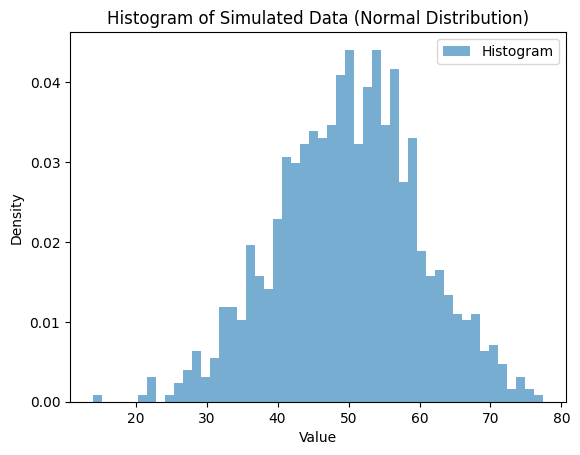

In [32]:
data = np.random.normal(loc=50, scale=10, size=1000)

plt.figure()
plt.hist(data, bins=50, density=True, alpha=0.6, label="Histogram")
plt.title("Histogram of Simulated Data (Normal Distribution)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part (b): Normal Distribution Fitting

MLE estimated mean (without outliers): 50.035816832392754
MLE estimated standard deviation (without outliers): 10.014545594050734


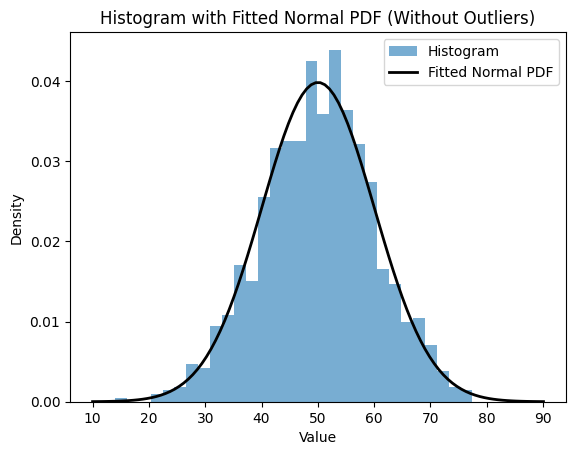

In [33]:
mu_hat = np.mean(data)
sigma_hat = np.std(data)

print("MLE estimated mean (without outliers):", mu_hat)
print("MLE estimated standard deviation (without outliers):", sigma_hat)

x = np.linspace(mu_hat - 4 * sigma_hat, mu_hat + 4 * sigma_hat, 100)

pdf_fitted = norm.pdf(x, mu_hat, sigma_hat)

plt.figure()
plt.hist(data, bins=30, density=True, alpha=0.6, label="Histogram")
plt.plot(x, pdf_fitted, "k", linewidth=2, label="Fitted Normal PDF")
plt.title("Histogram with Fitted Normal PDF (Without Outliers)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part (c): Handling Outliers

MLE estimated mean (with outliers): 53.94565843612673
MLE estimated standard deviation (with outliers): 20.03325503153474


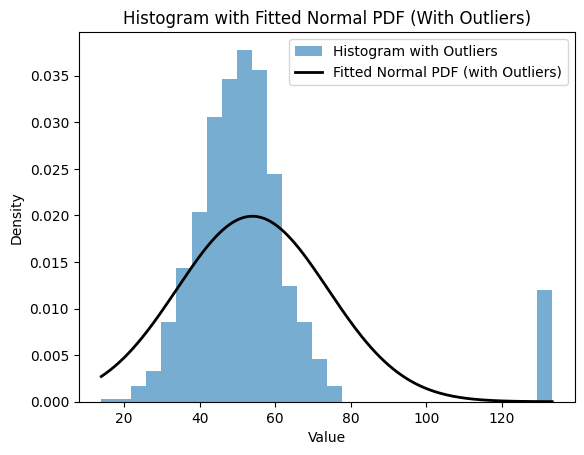

In [44]:
outliers = np.random.normal(loc=50, scale=20, size=15000)
outlier_mean = np.mean(outliers)
outlier_std = np.std(outliers)
# Remove all outliers that are in the first 4 standard deviations
outliers = outliers[
    np.logical_or(outliers < outlier_mean - 4 * outlier_std, outliers > outlier_mean + 4 * outlier_std)
]
# Randomly sample 50 outliers
outliers = np.random.choice(outliers, size=50)

data_with_outliers = np.concatenate([data, outliers])

mu_hat_out = np.mean(data_with_outliers)
sigma_hat_out = np.std(data_with_outliers)

# Print the estimated parameters with outliers
print("MLE estimated mean (with outliers):", mu_hat_out)
print("MLE estimated standard deviation (with outliers):", sigma_hat_out)

plt.figure()
plt.hist(
    data_with_outliers,
    bins=30,
    density=True,
    alpha=0.6,
    label="Histogram with Outliers",
)

x_out = np.linspace(np.min(data_with_outliers), np.max(data_with_outliers), 200)
pdf_fitted_out = norm.pdf(x_out, mu_hat_out, sigma_hat_out)

plt.plot(
    x_out, pdf_fitted_out, "k", linewidth=2, label="Fitted Normal PDF (with Outliers)"
)
plt.title("Histogram with Fitted Normal PDF (With Outliers)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

### 3.c.

#### Impact on Estimated Parameters
**Mean:** The introduction of outliers shifts the mean upward. In this example, the additional high-valued samples pull the mean away from the original central value.<br/>
**Standard Deviation:** The standard deviation increases because the outliers add greater variability to the dataset.

#### Approach to Detect Outliers:
**Z-Score Method:** Compute the z-score for each data point (# of standard deviations a point is from the mean). Points with a z-score above a threshold (commonly 3 or -3) can be flagged as outliers (this is because if our data is truly normally distribution, z-score > 3 means 0.1% of the data)